# GRIP - The Sparks Foundation
# Data Science & Business Analytics Intern - Oct-2021
# Task 6: Prediction using Decision Tree
# Author: AYILA NAVEEN SAI
# Dataset can be used downloaded from this link:- https://bit.ly/3kXTdox


## Importing  Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(data)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.shape

(150, 6)

In [8]:
data.size

900

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data['Species'].value_counts(sort=True)

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Checking for null values

In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

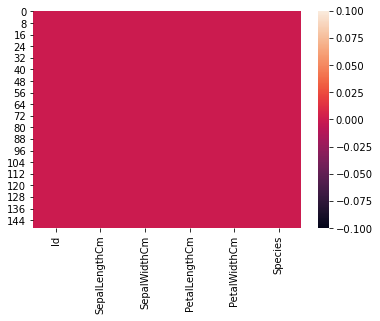

In [12]:
sb.heatmap(data.isnull())

In [13]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## checking for correlation

In [14]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Figure size 720x720 with 0 Axes>

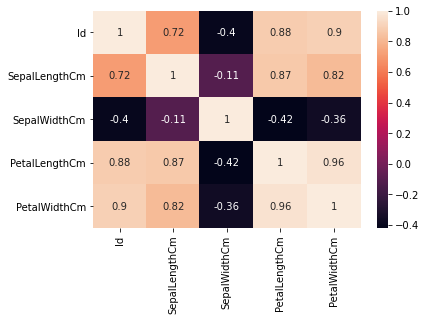

<Figure size 720x720 with 0 Axes>

In [15]:
sb.heatmap(data.corr(),annot=True)
plt.figure(figsize=(10,10))

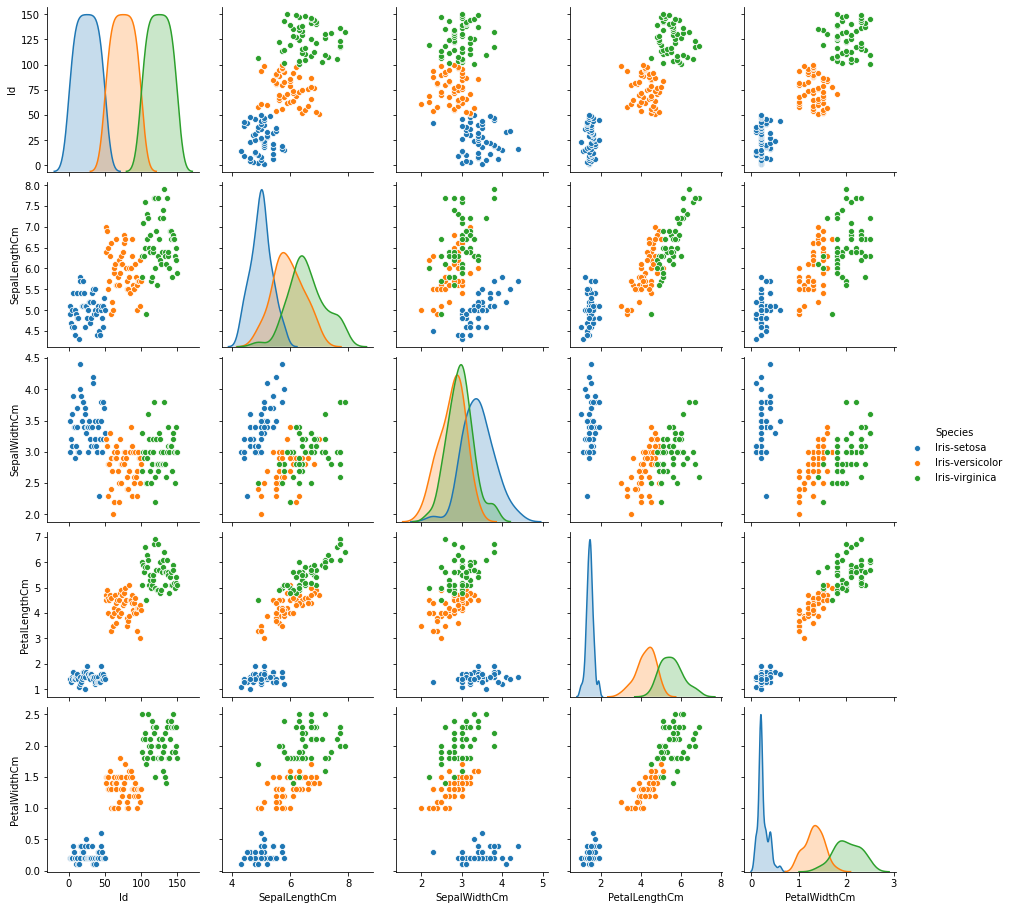

In [16]:
sb.pairplot(data,hue = "Species")

## Preparing the Data

In [17]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

In [18]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## Splitting The Data Into Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2

In [23]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4]])

In [24]:
Y_train

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris

In [25]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Training the Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

## Making Prediction

In [28]:
Y_predict=model.predict(X_test)

In [29]:
Y_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Accuracy score

In [31]:
accuracy_score(Y_test, Y_predict)

1.0

## Confusion matrix

In [32]:
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

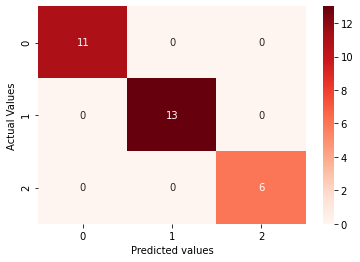

In [33]:
sb.heatmap(cm, cmap="Reds", annot= True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [34]:
df1= pd.DataFrame({"Actaual Y": Y_test, "Predicted Y":Y_predict})
df1.head(10)

,Actaual Y,Predicted Y
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [35]:
df1.tail()

,Actaual Y,Predicted Y
25,Iris-setosa,Iris-setosa
26,Iris-setosa,Iris-setosa
27,Iris-versicolor,Iris-versicolor
28,Iris-versicolor,Iris-versicolor
29,Iris-setosa,Iris-setosa


## Visualizing the Trianed Model

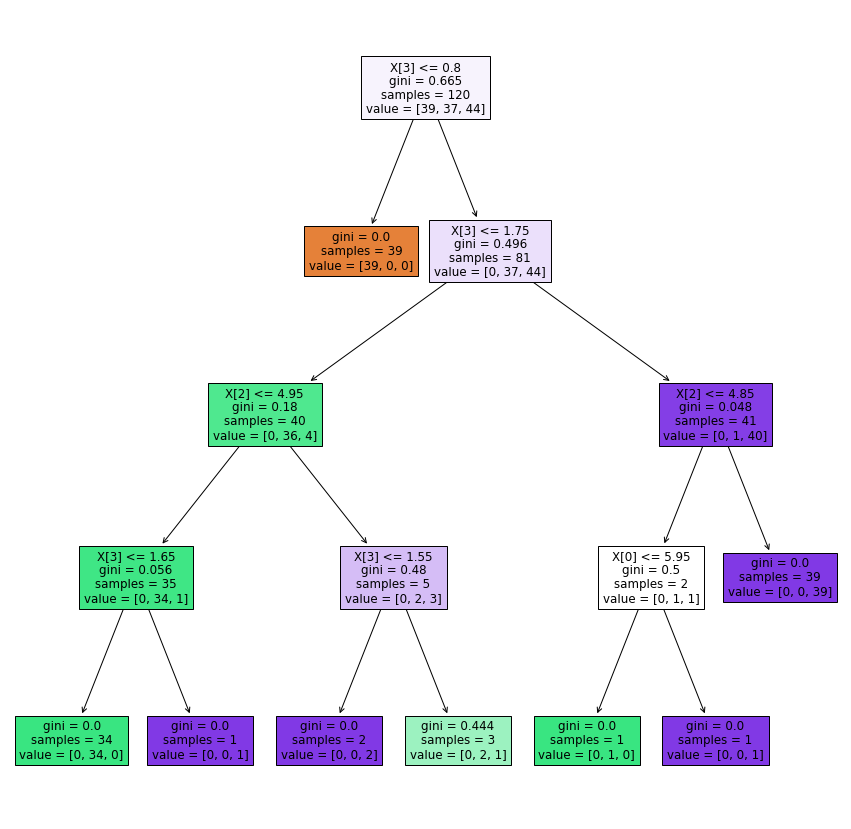

In [36]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)
plt.show()

In [37]:
own_Y_pred = model.predict([[6.5,3.0,5.2,2.0]])
print(own_Y_pred[0])

Iris-virginica


# THANK YOU!!!

